## Podstawowe metody przetwarzania obrazu

In [62]:
import numpy as np                          
import matplotlib.pyplot as plt             
from skimage import io, color, exposure, filters, util, morphology, data
from skimage.metrics import structural_similarity as ssim

plt.rcParams["figure.figsize"] = (12, 4)     # Domyślny rozmiar rysunku: szerokość 12 cali, wysokość 4 cale

def show_row(images, titles=None, cmap=None):
    """
    Wyświetla kilka obrazów obok siebie w jednym wierszu.

    Parametry:
    -----------
    images : list
        Lista obrazów (tablic NumPy) do wyświetlenia.
    titles : list (opcjonalnie)
        Lista tytułów dla każdego obrazu.
    cmap : str (opcjonalnie)
        Mapa kolorów (np. 'gray' dla obrazów w skali szarości).
    """

    n = len(images)                          # Liczba obrazów
    fig, axes = plt.subplots(1, n)           # Tworzy jeden wiersz z n kolumnami (dla każdego obrazu jedna oś)

    # Iteracja po wszystkich obrazach i ich osiach
    for i, ax in enumerate(np.atleast_1d(axes)):
        ax.imshow(images[i], cmap=cmap[i])      # Wyświetla obraz (z opcjonalną mapą kolorów)
        ax.axis('off')                       # Ukrywa osie (ramki, skale, liczby)
        if titles:                           # Jeśli podano tytuły
            ax.set_title(titles[i])          # Ustawia tytuł nad obrazem

    plt.show()                               # Wyświetla całość


### Zadanie 1. Eksplorator histogramów

Kontekst:  Wyrównanie  zakresu  jasności  często  zaczyna  się  od  zrozumienia  histogramu. 
Chcemy  porównać  rozkłady  tonalne  w  RGB  i  w  skali  szarości  oraz  zademonstrować 
rozciąganie zakresu na percentylach

Wskazówki: skimage.exposure.histogram, exposure.rescale_intensity, matplotlib 
(wspólne osie), normalizacja danych do [0,1]. 

1. Wczytaj obraz (RGB lub Gray) z skimage.data i/lub własny. 

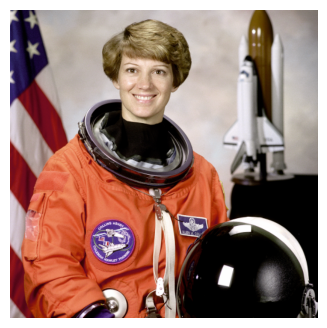

In [63]:
astronaut = data.astronaut()

if astronaut.ndim == 2:
    astronaut = np.stack([astronaut]*3, axis=-1)  # Tworzy RGB z jednego kanału
else:
    astronaut = astronaut[..., :3]

plt.imshow(astronaut)
plt.axis('off')
plt.show()

2. Oblicz i narysuj histogram(y) dla: 
o skali szarości (zbudowanej z RGB jako luminancja lub średnia kanałów), 
o każdego kanału R, G, B (jeśli obraz jest kolorowy). 

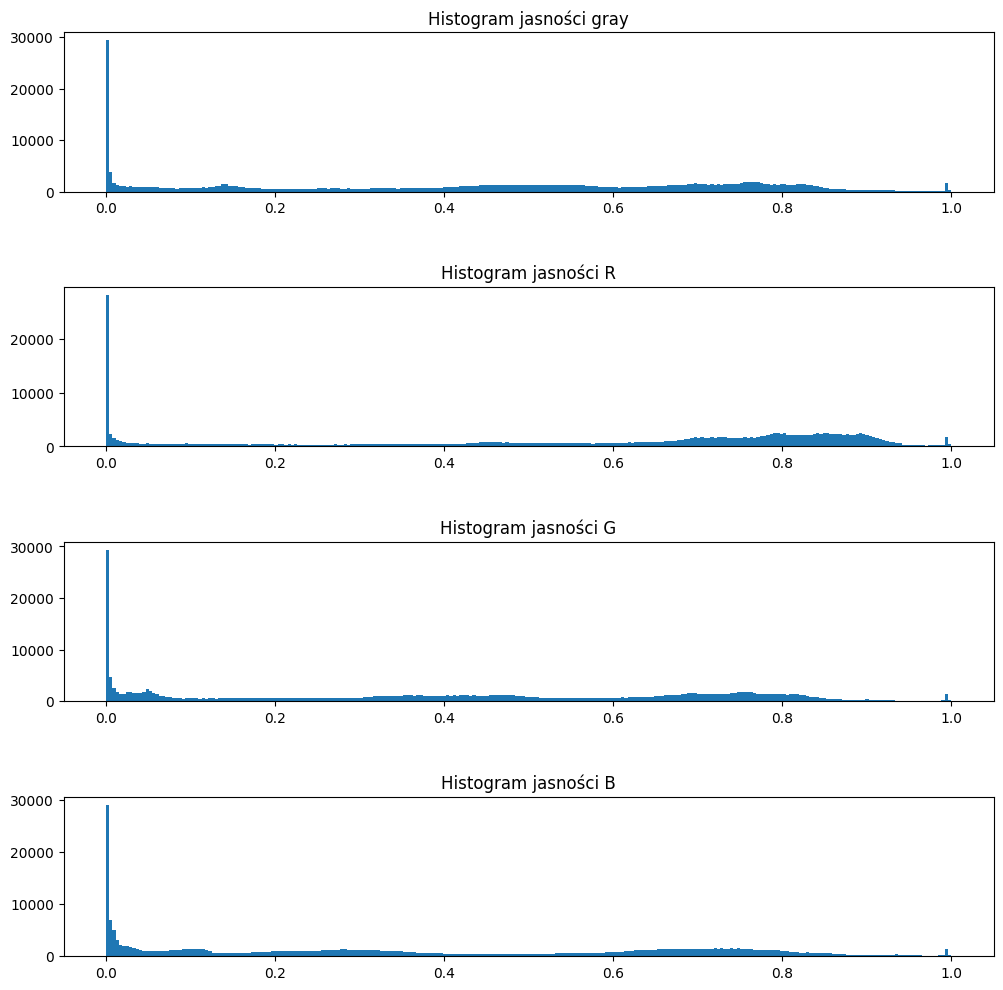

In [64]:
gray = color.rgb2gray(astronaut)
r = astronaut[..., 0]/256
g = astronaut[..., 1]/256
b = astronaut[..., 2]/256

def make_histograms(canals: list, names: list, horizontal_padding = 0.6):

    n = len(canals)                          
    fig, axes = plt.subplots(n, 1, figsize=(12, 3*len(canals)))

    for i, ax in enumerate(np.atleast_1d(axes)):
        ax.hist(canals[i].ravel(), bins=256, range=(0,1))
        ax.set_title(f'Histogram jasności {names[i]}')

    plt.subplots_adjust(hspace=horizontal_padding)
    plt.show()

make_histograms([gray, r, g, b], ["gray", "R", "G", "B"])


3. Zaimplementuj „stretching” intensywności z odcięciem percentyli p_low i p_high 
(domyślnie 2–98%).

In [65]:
def streching(image, gray_scale_func = None, p_low=0.02, p_high=0.98):
    if gray_scale_func:
        image = gray_scale_func(image)
    return exposure.rescale_intensity(image, out_range=(p_low, p_high))

4. Wyświetl: oryginał, stretched (gray i/lub RGB), odpowiadające histogramy (te same 
ustawienia osi/bins).

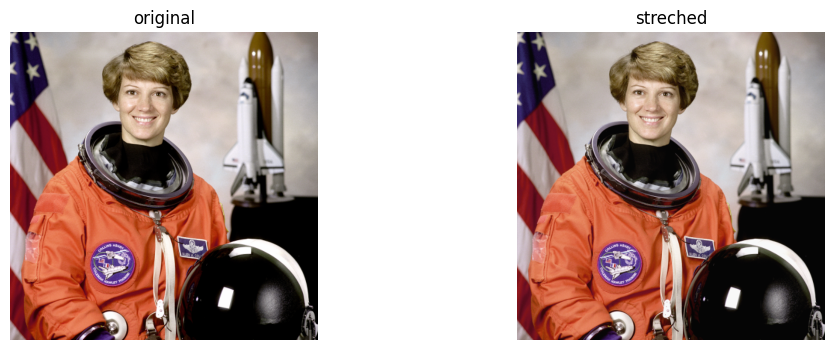

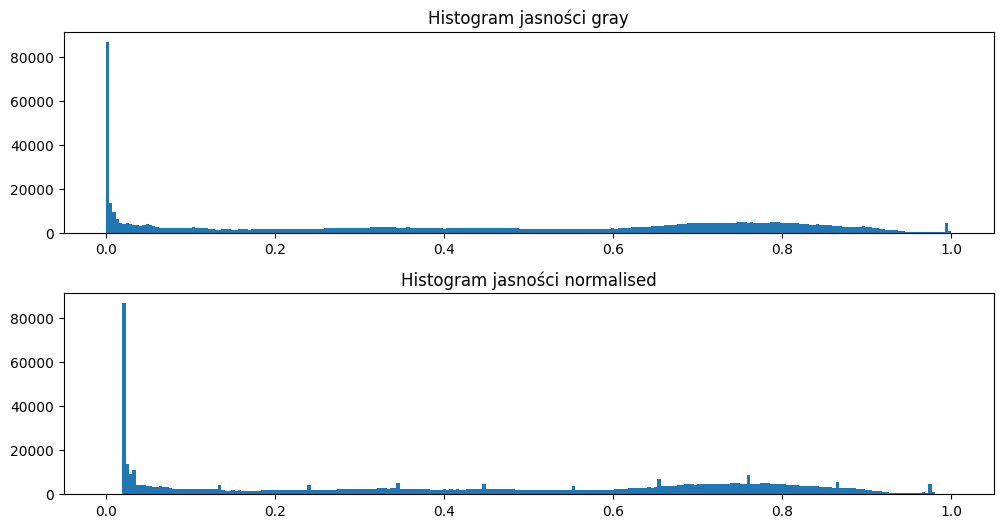

In [66]:
norm = streching(astronaut)
show_row([astronaut, norm], ["original", "streched"], ["gray", "gray"])
make_histograms([astronaut/256, norm], ["gray", "normalised"], 0.3)

5. Dodaj możliwość zmiany p_low, p_high oraz wyboru sposobu konwersji do Gray 
('lum', 'avg', 'r'/'g'/'b').

In [67]:
def lumination_of_colors(image):
    return color.rgb2gray(image)

def average_of_colors(image):
    return np.average(image, 2)

def convert_to_R(image):
    return image[..., 0]

def convert_to_G(image):
    return image[..., 1]

def convert_to_B(image):
    return image[..., 2]

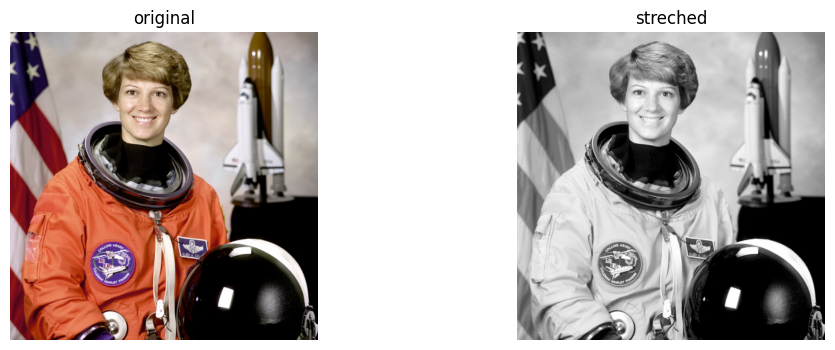

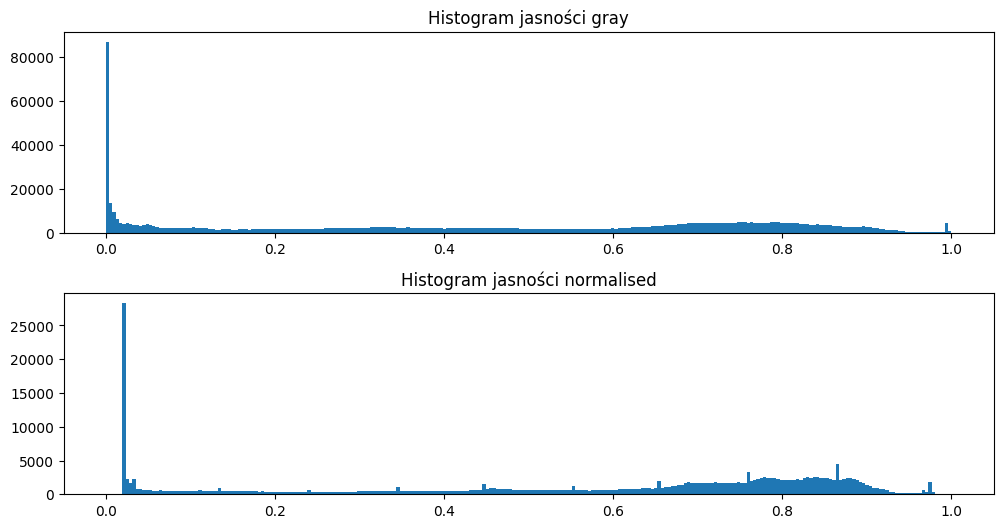

In [68]:
norm = streching(astronaut, convert_to_R)
show_row([astronaut, norm], ["original", "streched"], ["gray", "gray"])
make_histograms([astronaut/256, norm], ["gray", "normalised"], 0.3)

Wymagania minimalne. Jedna funkcja, która dla danego obrazu rysuje mozaikę: obraz(y) + 
histogram(y) przed/po; możliwość ustawienia percentyli

Wynik. Krótka notatka (3–5 zdań): co się dzieje z histogramem i kontrastem przy 2–98% vs 
1–99%? 



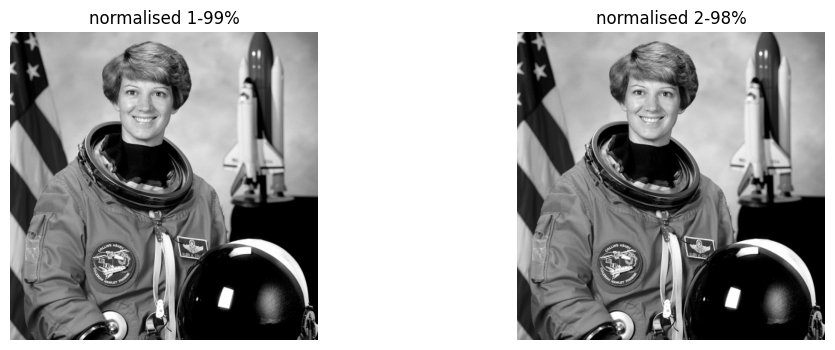

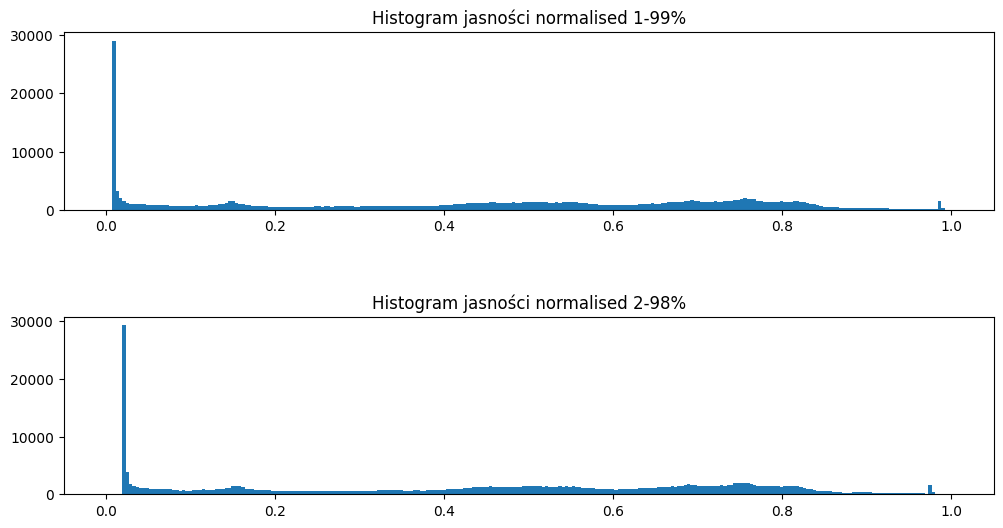

In [69]:
norm_2_98 = streching(astronaut, lumination_of_colors)
norm_1_99 = streching(astronaut, lumination_of_colors, 0.01, 0.99)

show_row([norm_1_99, norm_2_98], ["normalised 1-99%", "normalised 2-98%"], cmap=["gray", "gray"])
make_histograms([norm_1_99, norm_2_98], ["normalised 1-99%", "normalised 2-98%"])